In [1]:
%matplotlib widget
import pandas as pd
import numpy as np
import csv
import os
#import hdbscan
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load in Dataset Of Random Species

In [2]:
def  genereate_df_from_embeddings(file_path, species):
    size = 0
    data = np.matrix(np.arange(424))
    entries = os.scandir(file_path)#'./output/Caryothraustes')
    for entry in entries:
        try:
            if (entry.is_file()):
                path = entry.path
                f = open(path, "r", encoding="cp1252", errors='ignore')
                embedding = f.read().strip().split("\n")
                name = entry.name
                for em in embedding:
                    em = em.strip().split(",")
                    em_times = em.pop(0).split("\t")
                    em.insert(0, em_times[2])
                    em.insert(0, em_times[1])
                    em.insert(0, em_times[0])
                    em = [float(i) for i in em]
                    
                    em.insert(0, species)
                    em.insert(0, name.split(".")[0])

                    #if (data == None):
                    #    data = np.matrix(np.arange(len(em)))
                    #    size = len(em)
                    data = np.append(data, [em],axis=0)
        except Exception as e:
            print("issue with ", entry.name, e)
    data = np.delete(data, 0, 0)
    return pd.DataFrame(data = data, columns=np.append(["name", "species", "start", "end"], np.arange(420)))

Caryothraustes = genereate_df_from_embeddings('./output/Caryothraustes', "Caryothraustes canadensis")

In [5]:
file_paths = ['./output/Caryothraustes', './output/Lipaugus', './output/Anthus crenatus','./output/Hirundo aethiopica', './output/Mulleripicus pulverulentus']
species = ["Caryothraustes canadensis",  "Lipaugus vociferans", "Anthus crenatus", "Hirundo aethiopica", "Mulleripicus pulverulentus"]
df_list = []

for i in range(0, len(species)):
    df = genereate_df_from_embeddings(file_paths[i], species[i])
    df_list.append(df)
    print(f"Done {i}")
df_list
embeddings_df = pd.concat(df_list)

Done 0
Done 1
Done 2
Done 3
Done 4


In [6]:
for i in range(420):
    embeddings_df[str(i)] = pd.to_numeric(embeddings_df[str(i)])

In [7]:
def get_species_label(animal):
    return species.index(animal)

In [8]:
cluster_data = embeddings_df.get( map(str, np.append(range(0,420), "species"))).assign(species=embeddings_df.get("species").apply(get_species_label))

In [9]:
cluster_data

,0,1,2,3,4,5,6,7,8,9,...,411,412,413,414,415,416,417,418,419,species
0,1.228658,0.815652,0.413835,0.301341,0.558654,0.986016,0.098795,1.043028,0.932668,0.619331,...,1.328376,0.319371,0.233861,1.088433,1.121031,2.812040,1.394532,0.931559,0.442738,0
1,0.815852,0.275696,0.373194,0.224105,0.606085,0.283974,0.263323,0.262143,0.786978,0.412789,...,0.490966,0.455310,0.461166,0.563307,0.512161,1.163806,0.832833,0.546128,0.187715,0
2,0.270985,0.243305,0.207973,0.360586,0.309784,0.176708,0.257970,0.366657,0.594742,0.349074,...,0.426823,0.227841,0.172239,0.557856,0.578386,1.335247,0.754565,0.422393,0.160146,0
3,0.448748,0.335890,0.695951,0.202604,0.117397,0.483511,0.427255,0.627799,1.805513,1.158292,...,0.268892,0.272569,0.245031,1.216719,1.002366,2.577424,0.685319,0.521844,0.554144,0
4,0.333398,0.261002,0.349530,0.212176,0.412787,0.514907,0.125635,0.569371,0.961013,0.471827,...,0.614667,0.284727,0.664721,0.836641,0.574723,1.206286,0.627049,0.390778,0.291614,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,0.692507,0.313394,0.461367,1.094218,0.748151,0.504892,0.957902,0.350242,0.296509,1.820796,...,0.425111,0.878545,0.198202,0.639997,0.287792,0.757130,0.848587,1.270115,0.013087,4
281,0.397878,0.465051,0.413338,0.280147,0.449817,0.068147,0.611524,0.395812,0.387198,0.444557,...,0.258795,0.461975,0.416970,0.048955,0.369646,0.295579,0.903290,0.737372,0.589133,4
282,0.367306,0.032808,0.287913,0.848410,0.650606,0.683223,0.991964,0.116563,0.674317,0.982234,...,0.286246,0.420458,0.328761,0.654878,0.142633,0.481440,0.423396,1.010271,0.346262,4
283,0.619825,0.881526,1.288501,0.545975,0.796907,0.416866,0.785855,0.393980,0.744599,0.698103,...,0.517297,0.429037,0.603829,0.672056,0.663261,0.798565,0.540449,0.635524,0.845710,4


# Do centeroid distance predictions

In [10]:
import scipy

In [11]:
def compute_centeroid(df, cluster):
    df = df[df.get("species") == cluster].drop(columns=["species"])
    return df.sum(axis=0)/df.shape[0]

Split Data

In [12]:
cleaned_cluster_data = cluster_data.reset_index().drop(columns=["index"])
test = cleaned_cluster_data.sample(int(cleaned_cluster_data.shape[0] * 0.1)).sort_index(axis = 0)
test

,0,1,2,3,4,5,6,7,8,9,...,411,412,413,414,415,416,417,418,419,species
19,0.194290,0.353759,0.644503,0.300877,0.736336,0.042536,0.137370,0.565702,1.185572,0.128119,...,0.642891,0.581599,1.781401,0.522838,0.259403,1.590195,0.938684,1.793330,0.120374,0
51,0.528979,0.408542,0.387037,0.575231,0.896221,1.027779,1.528906,2.008421,1.317093,1.067263,...,0.632454,0.058461,0.723708,0.815625,1.495955,1.268945,2.037256,0.679940,0.429032,0
54,0.555536,0.341442,0.143662,0.895786,0.685314,1.126376,0.974429,1.725527,0.646137,0.755939,...,0.261124,0.571639,0.126372,0.860797,1.324912,1.489001,1.470830,0.404725,0.139849,0
80,0.468180,0.126158,0.344276,0.888958,0.430767,0.272816,0.726119,0.980755,0.472877,0.833300,...,0.436208,0.930642,1.696305,0.362548,1.276816,0.891124,0.674195,0.157269,0.466324,0
95,0.985257,0.445555,0.554097,0.451742,0.590115,0.476986,1.125379,0.262089,0.974714,0.441729,...,0.372176,0.318506,0.401224,0.341580,0.508551,0.724957,0.434443,0.398998,1.088039,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7413,0.160334,1.483820,0.156475,1.274714,0.521185,0.885586,1.103193,0.370055,1.381683,0.957358,...,0.971695,0.534485,0.289289,1.442039,0.385183,1.159786,0.559009,0.392314,0.573276,4
7414,0.246616,0.979033,0.506778,0.123259,0.597771,0.372426,0.318786,0.374764,0.794233,0.505639,...,0.079246,0.343996,0.046149,0.659080,0.559365,0.497595,0.620227,0.227351,0.308377,4
7417,0.363180,1.824926,0.671440,1.249149,0.083424,0.520339,1.077314,0.506768,0.926546,0.815818,...,1.094972,1.102453,0.736159,1.178224,0.209632,0.428806,0.861503,0.361935,0.550897,4
7421,0.255090,1.179052,0.696078,0.396804,0.093303,0.399338,0.294995,0.652669,0.897681,0.561766,...,0.281249,0.467064,0.362148,0.589731,0.547484,0.417739,0.636021,0.380076,0.310278,4


In [13]:
train = cleaned_cluster_data[~cleaned_cluster_data.index.isin(test.index)].sort_index(axis = 0)
train

,0,1,2,3,4,5,6,7,8,9,...,411,412,413,414,415,416,417,418,419,species
0,1.228658,0.815652,0.413835,0.301341,0.558654,0.986016,0.098795,1.043028,0.932668,0.619331,...,1.328376,0.319371,0.233861,1.088433,1.121031,2.812040,1.394532,0.931559,0.442738,0
1,0.815852,0.275696,0.373194,0.224105,0.606085,0.283974,0.263323,0.262143,0.786978,0.412789,...,0.490966,0.455310,0.461166,0.563307,0.512161,1.163806,0.832833,0.546128,0.187715,0
2,0.270985,0.243305,0.207973,0.360586,0.309784,0.176708,0.257970,0.366657,0.594742,0.349074,...,0.426823,0.227841,0.172239,0.557856,0.578386,1.335247,0.754565,0.422393,0.160146,0
3,0.448748,0.335890,0.695951,0.202604,0.117397,0.483511,0.427255,0.627799,1.805513,1.158292,...,0.268892,0.272569,0.245031,1.216719,1.002366,2.577424,0.685319,0.521844,0.554144,0
4,0.333398,0.261002,0.349530,0.212176,0.412787,0.514907,0.125635,0.569371,0.961013,0.471827,...,0.614667,0.284727,0.664721,0.836641,0.574723,1.206286,0.627049,0.390778,0.291614,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7431,0.692507,0.313394,0.461367,1.094218,0.748151,0.504892,0.957902,0.350242,0.296509,1.820796,...,0.425111,0.878545,0.198202,0.639997,0.287792,0.757130,0.848587,1.270115,0.013087,4
7432,0.397878,0.465051,0.413338,0.280147,0.449817,0.068147,0.611524,0.395812,0.387198,0.444557,...,0.258795,0.461975,0.416970,0.048955,0.369646,0.295579,0.903290,0.737372,0.589133,4
7433,0.367306,0.032808,0.287913,0.848410,0.650606,0.683223,0.991964,0.116563,0.674317,0.982234,...,0.286246,0.420458,0.328761,0.654878,0.142633,0.481440,0.423396,1.010271,0.346262,4
7434,0.619825,0.881526,1.288501,0.545975,0.796907,0.416866,0.785855,0.393980,0.744599,0.698103,...,0.517297,0.429037,0.603829,0.672056,0.663261,0.798565,0.540449,0.635524,0.845710,4


generate a list of centeroids for each species in training data set

In [14]:
centeroids = []
for cluster in np.unique(cluster_data.get("species")):
    centeroids.append(compute_centeroid(train, cluster).to_numpy())
centeroids = np.stack( centeroids, axis=0 )
centeroids    

array([[0.49842997, 0.64738762, 0.51537716, ..., 0.81860691, 0.52706583,
        0.67777986],
       [0.57157728, 0.44090611, 0.60538151, ..., 1.35192444, 0.6301663 ,
        0.54505251],
       [0.80944717, 0.64357245, 1.16792816, ..., 0.6439101 , 0.74600305,
        0.73506782],
       [0.65704959, 0.57160973, 1.05494723, ..., 0.44707818, 0.79867417,
        0.60808735],
       [0.53849378, 0.953608  , 0.50813184, ..., 0.73695968, 0.71242434,
        0.61412279]])

Based on training centeroids, attempt to predict species labels of testing dataset

In [15]:
#get_dist_train = train.reset_index().drop(columns=["index", "species"])
#dist_matrix_train = scipy.spatial.distance_matrix(get_dist_train.to_numpy(dtype=float),centeroids)

get_dist_test = test.reset_index().drop(columns=["index", "species"])
dist_matrix_test = scipy.spatial.distance_matrix(get_dist_test.to_numpy(dtype=float),centeroids)

In [16]:
test.reset_index().get("species")

0      0
1      0
2      0
3      0
4      0
      ..
738    4
739    4
740    4
741    4
742    4
Name: species, Length: 743, dtype: int64

In [17]:
dist_df = pd.DataFrame(dist_matrix_test).assign(species =test.reset_index().get("species"))
dist_df

,0,1,2,3,4,species
0,9.683646,9.357766,10.648556,10.492694,10.843372,0
1,9.505473,10.390111,11.036778,11.236004,11.152620,0
2,9.517319,9.973494,10.279575,10.361617,10.696772,0
3,7.568226,9.489311,9.343179,9.260371,9.424303,0
4,7.917678,8.001695,8.956899,7.269811,8.617303,0
...,...,...,...,...,...,...
738,9.796392,10.486058,10.469855,10.861735,7.033402,4
739,8.586138,7.885687,9.081045,7.722532,8.328512,4
740,10.046886,10.487466,10.623156,11.160641,7.716825,4
741,8.768638,7.690877,9.188939,7.559493,8.514263,4


In [18]:
stats = dist_df[dist_df.get("species") == 0].describe()
stats

,0,1,2,3,4,species
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,8.226256,9.635092,9.858807,9.991527,9.849950,0.0
std,0.884288,1.244620,0.947083,1.452858,0.878106,0.0
min,6.610632,6.827561,8.074341,7.269811,8.369620,0.0
25%,7.448055,8.855728,9.343131,9.095135,9.244915,0.0
50%,8.335227,9.549856,9.889974,10.054122,9.939808,0.0
75%,8.755913,10.401942,10.520751,11.149321,10.487416,0.0
max,9.775773,12.233102,11.655742,12.503241,11.619984,0.0


In [54]:
def outliers(distance_row):
    stats = dist_df[dist_df.get("species") == distance_row.get("species")].describe()
    # low = stats.loc["25%"]
    high = stats.loc["75%"]
    return ((distance_row < high))

outliers(dist_df.iloc[4])

0           True
1           True
2           True
3           True
4           True
species    False
dtype: bool

In [55]:
non_outliers = dist_df.apply(outliers, axis=1).assign(species=dist_df.get("species"))
non_outliers

,0,1,2,3,4,species
0,False,True,False,True,False,0
1,False,True,False,False,False,0
2,False,True,True,True,False,0
3,True,True,True,True,True,0
4,True,True,True,True,True,0
...,...,...,...,...,...,...
738,True,False,True,True,True,4
739,True,True,True,True,False,4
740,False,False,False,False,True,4
741,True,True,True,True,False,4


In [56]:
def is_likely_outlier(row):
    outliers_detected = non_outliers.iloc[row]
    embedding_data = test.iloc[row]
    return outliers_detected.loc[outliers_detected.loc["species"]]
    

In [57]:
is_likely_outlier(0)

False

In [58]:
def create_species_predictions(dist_matrix):
    species_predicted = np.array([])
    for i in range(len(dist_matrix)):
        species_predicted = np.append(species_predicted, np.where(dist_matrix[i] == min(dist_matrix[i])))
    return species_predicted

species_predicted = create_species_predictions(dist_matrix_test)
species_predicted

array([1., 0., 0., 0., 3., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 3., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 3., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 3., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 4., 1., 3., 1., 1., 1., 1., 1., 4., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1.

In [59]:
len(species_predicted)

743

In [60]:
test

,0,1,2,3,4,5,6,7,8,9,...,411,412,413,414,415,416,417,418,419,species
19,0.194290,0.353759,0.644503,0.300877,0.736336,0.042536,0.137370,0.565702,1.185572,0.128119,...,0.642891,0.581599,1.781401,0.522838,0.259403,1.590195,0.938684,1.793330,0.120374,0
51,0.528979,0.408542,0.387037,0.575231,0.896221,1.027779,1.528906,2.008421,1.317093,1.067263,...,0.632454,0.058461,0.723708,0.815625,1.495955,1.268945,2.037256,0.679940,0.429032,0
54,0.555536,0.341442,0.143662,0.895786,0.685314,1.126376,0.974429,1.725527,0.646137,0.755939,...,0.261124,0.571639,0.126372,0.860797,1.324912,1.489001,1.470830,0.404725,0.139849,0
80,0.468180,0.126158,0.344276,0.888958,0.430767,0.272816,0.726119,0.980755,0.472877,0.833300,...,0.436208,0.930642,1.696305,0.362548,1.276816,0.891124,0.674195,0.157269,0.466324,0
95,0.985257,0.445555,0.554097,0.451742,0.590115,0.476986,1.125379,0.262089,0.974714,0.441729,...,0.372176,0.318506,0.401224,0.341580,0.508551,0.724957,0.434443,0.398998,1.088039,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7413,0.160334,1.483820,0.156475,1.274714,0.521185,0.885586,1.103193,0.370055,1.381683,0.957358,...,0.971695,0.534485,0.289289,1.442039,0.385183,1.159786,0.559009,0.392314,0.573276,4
7414,0.246616,0.979033,0.506778,0.123259,0.597771,0.372426,0.318786,0.374764,0.794233,0.505639,...,0.079246,0.343996,0.046149,0.659080,0.559365,0.497595,0.620227,0.227351,0.308377,4
7417,0.363180,1.824926,0.671440,1.249149,0.083424,0.520339,1.077314,0.506768,0.926546,0.815818,...,1.094972,1.102453,0.736159,1.178224,0.209632,0.428806,0.861503,0.361935,0.550897,4
7421,0.255090,1.179052,0.696078,0.396804,0.093303,0.399338,0.294995,0.652669,0.897681,0.561766,...,0.281249,0.467064,0.362148,0.589731,0.547484,0.417739,0.636021,0.380076,0.310278,4


Assign these predicted species to test dataset

In [61]:
dist_df.reset_index().get("index").apply(is_likely_outlier)

0      False
1      False
2      False
3       True
4       True
       ...  
738     True
739    False
740     True
741    False
742    False
Name: index, Length: 743, dtype: bool

In [62]:
centeroid_work = test.reset_index().assign(
        species_predicted=species_predicted,
        outlier=dist_df.reset_index().get("index").apply(is_likely_outlier)
       ).get(["species", "species_predicted", "outlier"])
centeroid_work

,species,species_predicted,outlier
0,0,1.0,False
1,0,0.0,False
2,0,0.0,False
3,0,0.0,True
4,0,3.0,True
...,...,...,...
738,4,4.0,True
739,4,3.0,False
740,4,4.0,True
741,4,3.0,False


In [63]:
false_positives = centeroid_work[(centeroid_work.species != centeroid_work.species_predicted) & (centeroid_work.get("outlier") == True)]
false_positives.shape[0]

45

In [64]:
centeroid_work[(centeroid_work.species != centeroid_work.species_predicted)].shape[0]

82

Proportions of incorrectly labeled data

In [65]:
false_positives.shape[0]/centeroid_work.shape[0]

0.06056527590847914

In [66]:
false_positives[false_positives.get("outlier") == False].shape[0]/centeroid_work.shape[0]

0.0

In [67]:
centeroid_work[centeroid_work.get("outlier") == False].shape[0]/centeroid_work.shape[0]

0.253028263795424

====================================================

In [68]:
centeroids = []
for cluster in np.unique(cluster_data.get("species")):
    centeroids.append(compute_centeroid(cleaned_cluster_data, cluster).to_numpy())
centeroids = np.stack( centeroids, axis=0 )
get_dist_test = cluster_data.drop(columns=["species"])
dist_matrix_all = scipy.spatial.distance_matrix(get_dist_test.to_numpy(dtype=float),centeroids)
species_predicted = create_species_predictions(dist_matrix_all)
species_predicted

array([0., 1., 3., ..., 4., 4., 4.])

# Visualizations

In [69]:
pca = PCA(n_components = 3) # Default n_components = min(n_samples, n_features)
X_train_pc = pca.fit_transform(embeddings_df.get( map(str, range(0,420))))

pd.DataFrame(pca.components_.T)
X_train_pc
pca_embeddings = pd.DataFrame(data={"cluster": species_predicted, "species": list(embeddings_df.get("species").apply(get_species_label))})
pca_embeddings = pd.concat([pca_embeddings, pd.DataFrame(X_train_pc)], axis=1)
pca_embeddings.columns = ["species_predicted", "species", "x", "y", "z"]
#pca_embeddings = pca_embeddings.assign(species=embeddings_df.get("species"))
pca_embeddings

,species_predicted,species,x,y,z
0,0.0,0,2.819214,-0.875623,2.873617
1,1.0,0,-5.734825,0.906580,0.163681
2,3.0,0,-6.501771,1.251082,0.192845
3,0.0,0,-0.417448,0.118104,2.192879
4,1.0,0,-5.259651,0.673398,-0.205153
...,...,...,...,...,...
7431,4.0,4,-0.073068,1.270751,2.203925
7432,3.0,4,-4.579151,2.301102,0.467276
7433,4.0,4,-0.997160,1.332846,2.249997
7434,4.0,4,-0.916085,1.545297,2.577001


## Species Predicted In Test Sample

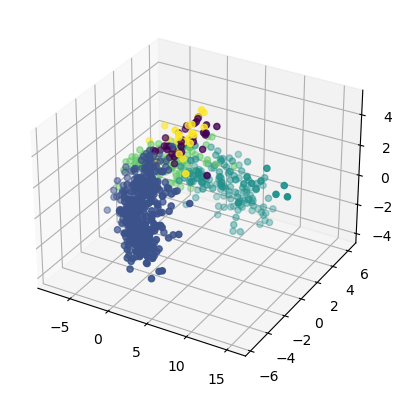

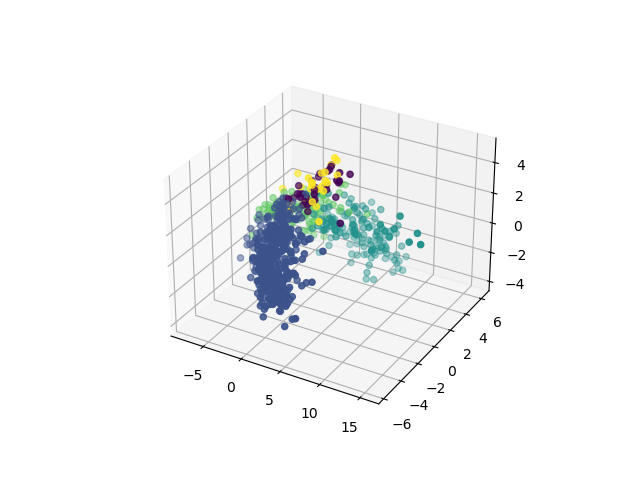

In [88]:
#cleaned_cluster_data[~cleaned_cluster_data.index.isin(test.index)].sort_index(axis = 0)
embeddings_to_plot = pca_embeddings[pca_embeddings.index.isin(test.index)].sort_index(axis = 0)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = ax.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"),embeddings_to_plot.get("z"), c=embeddings_to_plot.get("species_predicted"))
fig

## Actual Species In Test Sample

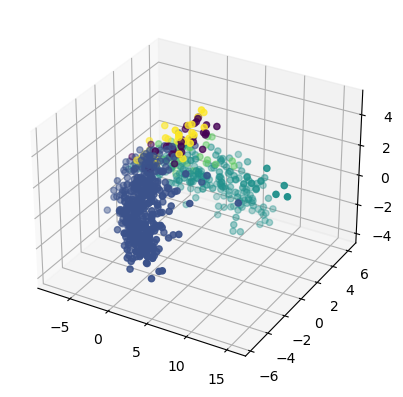

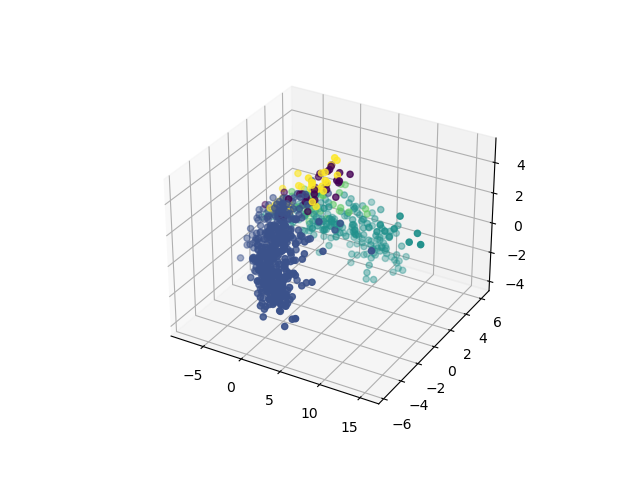

In [89]:
embeddings_to_plot = pca_embeddings[pca_embeddings.index.isin(test.index)].sort_index(axis = 0)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = ax.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"),embeddings_to_plot.get("z"), c=embeddings_to_plot.get("species"))
fig

## Species Predicted != Species Labels in Test Sample

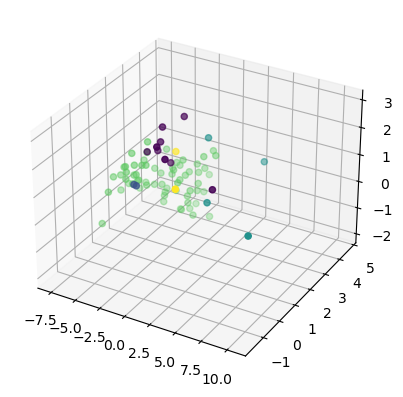

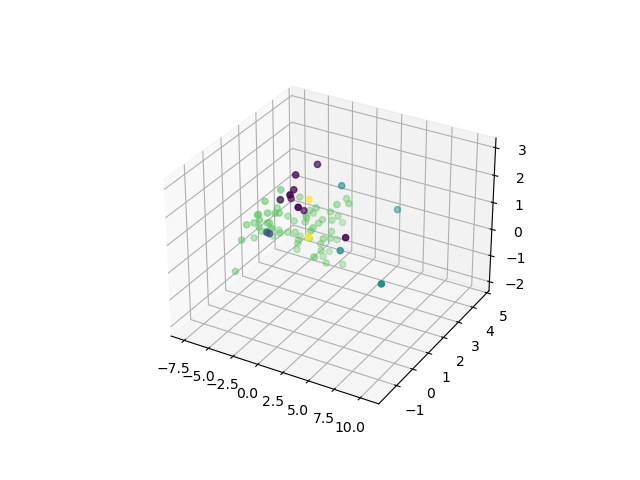

In [90]:
embeddings_to_plot = pca_embeddings[(pca_embeddings.index.isin(test.index)) & (pca_embeddings.species != pca_embeddings.species_predicted)]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = ax.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"),embeddings_to_plot.get("z"), c=embeddings_to_plot.get("species_predicted"))
fig

## Species Predicted == Species Labels

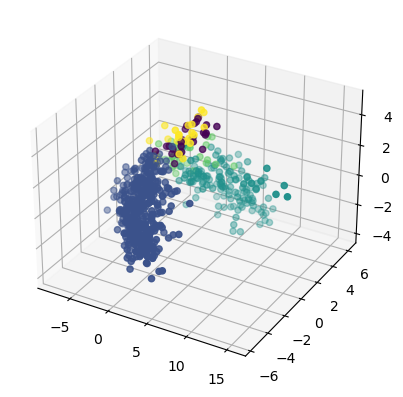

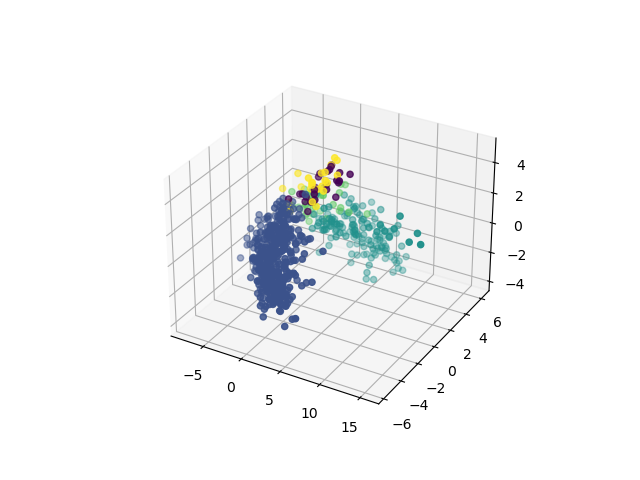

In [91]:
embeddings_to_plot = pca_embeddings[(pca_embeddings.index.isin(test.index)) & (pca_embeddings.species == pca_embeddings.species_predicted)]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = ax.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"),embeddings_to_plot.get("z"), c=embeddings_to_plot.get("species_predicted"))
fig

All Data Again


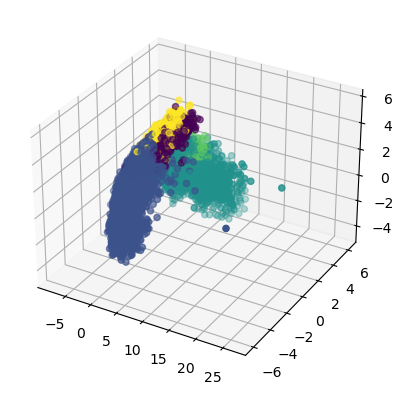

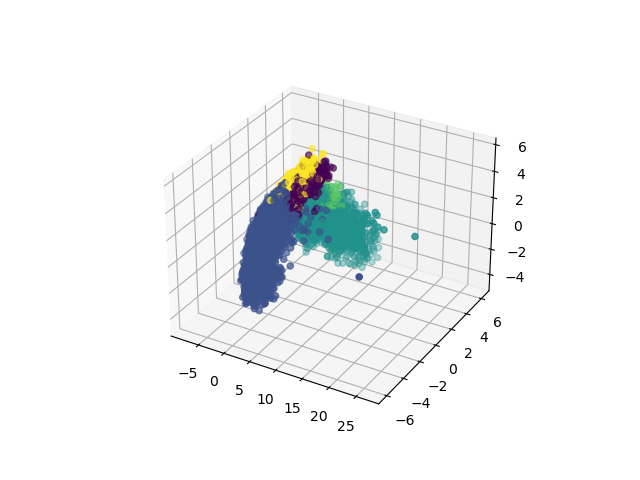

In [92]:
embeddings_to_plot = pca_embeddings
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = ax.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"),embeddings_to_plot.get("z"), c=embeddings_to_plot.get("species"))
fig

# Conclusion?

- Promsing sign we can use simple centorids to expand birdnet's ablity without needing to retrain birdnet
- When birds cluster together, it may confuse this algorithm